In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf

In [ ]:
import matplotlib.pyplot as plt

In [ ]:

labels = ['cracked_test', 'pothole_test','rut_test']
img_size = 180
def get_data(data_dir):
    i = 0
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                i = i+1
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
                print(i)
            except Exception as e:
                print(e)

    return np.array(data)


In [ ]:
train = get_data('/content/drive/MyDrive/asphalt/')


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


<ipython-input-4-c209edf78f91>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
val = get_data('/content/drive/MyDrive/test/')

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167


<ipython-input-6-ea44b8852b23>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)


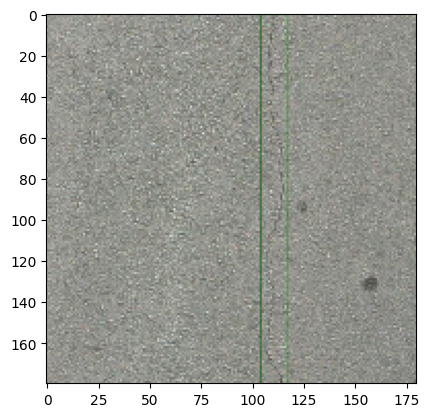

In [ ]:
plt.imshow(x_train[0])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='avg',classes=3,
                   weights=None)
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())

resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(250,activation='relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(3, activation='softmax'))

In [ ]:
resnet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 module_wrapper (ModuleWrapp  (None, 2048)             0         
 er)                                                             
                                                                 
 module_wrapper_1 (ModuleWra  (None, 512)              1049088   
 pper)                                                           
                                                                 
 module_wrapper_2 (ModuleWra  (None, 250)              128250    
 pper)                                                           
                                                                 
 dropout (Dropout)           (None, 250)               0         
                                                        

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)

In [ ]:

resnet_model.compile(optimizer=Adam(lr=0.01),loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

In [ ]:
history = resnet_model.fit(x_train,y_train,epochs = 80 , validation_data = (x_val, y_val),callbacks=[callback])

Epoch 1/80
69/69 [==============================] - 21s 106ms/step - loss: 1.0953 - accuracy: 0.3579 - val_loss: 1.0517 - val_accuracy: 0.5030
Epoch 2/80
69/69 [==============================] - 5s 73ms/step - loss: 1.0751 - accuracy: 0.4269 - val_loss: 1.0120 - val_accuracy: 0.5030
Epoch 3/80
69/69 [==============================] - 5s 79ms/step - loss: 1.0348 - accuracy: 0.5302 - val_loss: 0.9531 - val_accuracy: 0.7605
Epoch 4/80
69/69 [==============================] - 5s 77ms/step - loss: 0.9375 - accuracy: 0.6216 - val_loss: 0.9182 - val_accuracy: 0.5749
Epoch 5/80
69/69 [==============================] - 5s 77ms/step - loss: 0.8192 - accuracy: 0.6869 - val_loss: 0.7012 - val_accuracy: 0.7665
Epoch 6/80
69/69 [==============================] - 5s 77ms/step - loss: 0.7279 - accuracy: 0.7207 - val_loss: 0.7436 - val_accuracy: 0.7365
Epoch 7/80
69/69 [==============================] - 5s 77ms/step - loss: 0.6965 - accuracy: 0.7217 - val_loss: 0.8012 - val_accuracy: 0.7066
Epoch 8/80


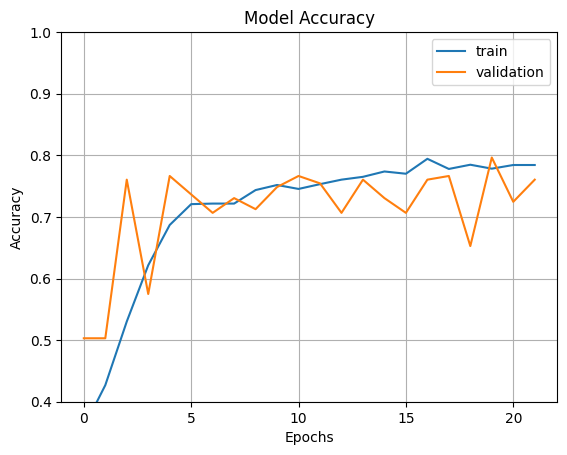

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

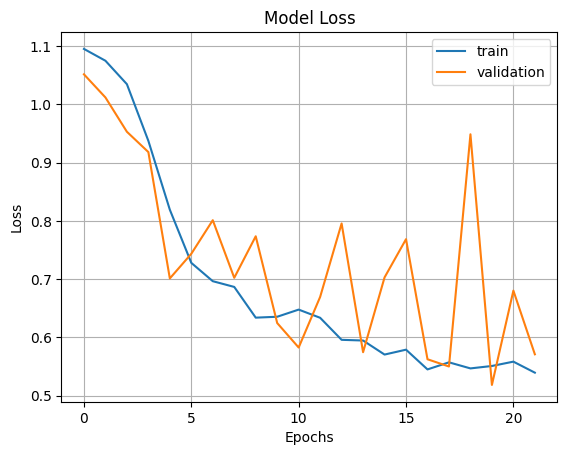

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
#from tensorflow.keras.applications.resnet50 import ResNet50

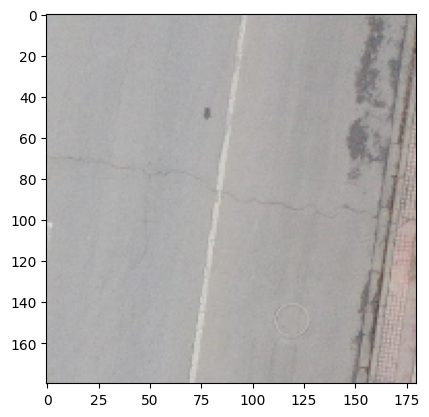

In [ ]:
plt.imshow(x_val[0])